<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics

Загрузить датасет по url:


In [2]:
# следующая строчка подключает сертификат для защищенного соединения
# ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
# url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
# df=pd.read_csv(url)
world_happiness = pd.read_csv('world-happiness-report-2019.csv')

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [3]:
world_happiness.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

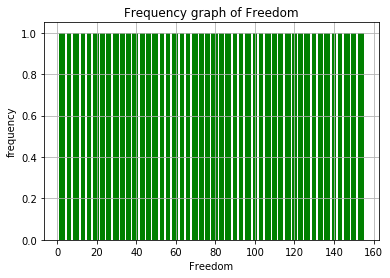

In [6]:
n, bins, patches = plt.hist(world_happiness['Freedom'], 200, facecolor='g')

plt.xlabel('Freedom')
plt.ylabel('frequency')
plt.title('Frequency graph of Freedom')
plt.grid(True)

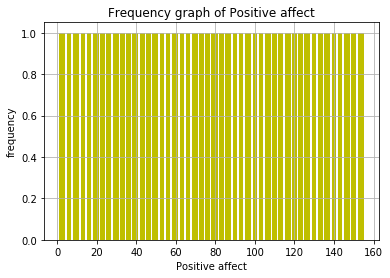

In [5]:
n, bins, patches = plt.hist(world_happiness['Positive affect'], 200, facecolor='y')

plt.xlabel('Positive affect')
plt.ylabel('frequency')
plt.title('Frequency graph of Positive affect')
plt.grid(True)

#### Параметры Freedom и Positive affect датасета world_happiness имеют равномерное распределение.

In [7]:
freedom = world_happiness[~world_happiness['Freedom'].isnull()]['Freedom']

Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [8]:
print(f'The maximum value: {max(freedom)}')
print(f'The minimum value: {min(freedom)}')
print(f'The range: {max(freedom) - min(freedom)}')
print(f'The expected value: {statistics.mean(freedom)}')
print(f'The median: {statistics.median(freedom)}')
print(f'The standart deviation: {statistics.pstdev(freedom)}')
print(f'The variance: {statistics.pvariance(freedom)}')
print(f"The outliers: {world_happiness['Freedom'].isnull().sum()}")
print(f'The mode: {statistics.mode(freedom)}')

The maximum value: 155.0
The minimum value: 1.0
The range: 154.0
The expected value: 78.0
The median: 78.0
The standart deviation: 44.74371464239419
The variance: 2002.0
The outliers: 1


StatisticsError: no unique mode; found 155 equally common values

Почему нельзя найти моду?

#### Мода соответствует тому значению, которое встречается больше всего, но т.к. все значения встречаются один раз, то мода 

#### не определена.

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [9]:
world_happiness['Positive affect'].isnull().sum()

1

In [10]:
positive_affect = world_happiness[~world_happiness['Positive affect'].isnull()]['Positive affect']

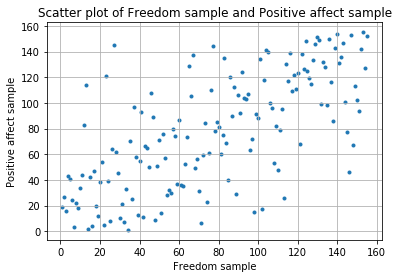

In [11]:
plt.xlabel('Freedom sample')
plt.ylabel('Positive affect sample')
plt.title('Scatter plot of Freedom sample and Positive affect sample')
plt.grid(True)
plt.scatter(freedom, positive_affect, marker='.')

In [12]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(freedom, positive_affect)
print('Pearson correlation coefficient:', corr)

Pearson correlation coefficient: 0.6817698430601656


#### Коэффициент корреляции Пирсона далек от нуля, значит между параметрами Freedom и Positive affect есть 

#### зависимость. Положительный знак коэффициента означает прямую зависимость, т.е. с увеличением показателя Freedom, 

#### увеличивается показатель Positive affect.

Нормализовать данные колонки Freedom (централизация + масштабирование)

In [13]:
freedom_1 = freedom - freedom.mean()
print(min(freedom_1))
print(max(freedom_1))
freedom_1.mean()

-77.0
77.0


0.0

In [14]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom_2 = min_max_scaler.fit_transform(np.array(freedom_1).reshape(-1, 1))
print(min(freedom_2))
print(max(freedom_2))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

In [15]:
world_happiness.corr()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
Ladder,1.000000,0.539362,0.491432,0.523643,0.817842,0.546777,0.190071,0.497856,0.813367,0.816740
SD of Ladder,0.539362,1.000000,0.085381,0.619267,0.599464,0.251856,0.258639,0.392154,0.629662,0.611376
Positive affect,0.491432,0.085381,1.000000,0.389697,0.386269,0.681770,0.209659,0.354877,0.304522,0.332839
Negative affect,0.523643,0.619267,0.389697,1.000000,0.621888,0.430241,0.158903,0.338226,0.542143,0.488649
Social support,0.817842,0.599464,0.386269,0.621888,1.000000,0.448903,0.118434,0.442432,0.772912,0.740728
Freedom,0.546777,0.251856,0.681770,0.430241,0.448903,1.000000,0.381304,0.489991,0.409501,0.416263
Corruption,0.190071,0.258639,0.209659,0.158903,0.118434,0.381304,1.000000,0.266138,0.198581,0.123132
Generosity,0.497856,0.392154,0.354877,0.338226,0.442432,0.489991,0.266138,1.000000,0.478739,0.431620
Log of GDP\nper capita,0.813367,0.629662,0.304522,0.542143,0.772912,0.409501,0.198581,0.478739,1.000000,0.847580
Healthy life\nexpectancy,0.816740,0.611376,0.332839,0.488649,0.740728,0.416263,0.123132,0.431620,0.847580,1.000000


Загрузить таблицу цен на авокадо: 

In [16]:
df=pd.read_csv('avocado.csv')
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

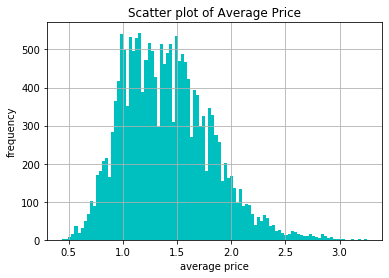

In [17]:
n, bins, patches = plt.hist(df['AveragePrice'], 100, facecolor='c')

plt.xlabel('average price')
plt.ylabel('frequency')
plt.title('Scatter plot of Average Price')
plt.grid(True)

#### Колонка Average Price имеет нормальное распределение значений.

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

In [18]:
corr1 , p_value1 = pearsonr(df['4046'] ,df['AveragePrice'])
corr2 , p_value2 = pearsonr(df['4225'] ,df['AveragePrice'])
corr3 , p_value3 = pearsonr(df['4770'] ,df['AveragePrice'])
print(corr1)
print(corr2)
print(corr3)

-0.20831704848788474
-0.17292777250933544
-0.17944598397975614


#### Во всех случаях корреляция обратная. Это означает, что с увеличением средней цены на авокадо, общее количество 

#### купленных авокадо всех видов падает, у авокадо с кодом 4046 немного больше.